In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [5]:
# Code starts here
train = pd.read_csv('train.csv')
print(train.head(5))
print(train.shape)
print(train.info())
print(train.describe())

test = pd.read_csv('test.csv')
# Code ends here

     Id  Age BusinessTravel  DailyRate              Department  \
0   784   38  Travel_Rarely        330  Research & Development   
1  1383   36     Non-Travel       1351  Research & Development   
2    71   29  Travel_Rarely       1328  Research & Development   
3  1414   47  Travel_Rarely       1180  Research & Development   
4  1184   54  Travel_Rarely        584  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                17          1  Life Sciences              1            1088   
1                 9          4  Life Sciences              1            1949   
2                 2          3  Life Sciences              1              94   
3                25          3        Medical              1            1993   
4                22          5        Medical              1            1665   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        3  Female          65

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

categorical_columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition']
numerical_columns: ['Id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


0       False
1       False
2       False
3       False
4       False
        ...  
1276    False
1277    False
1278    False
1279    False
1280    False
Name: Attrition, Length: 1281, dtype: bool

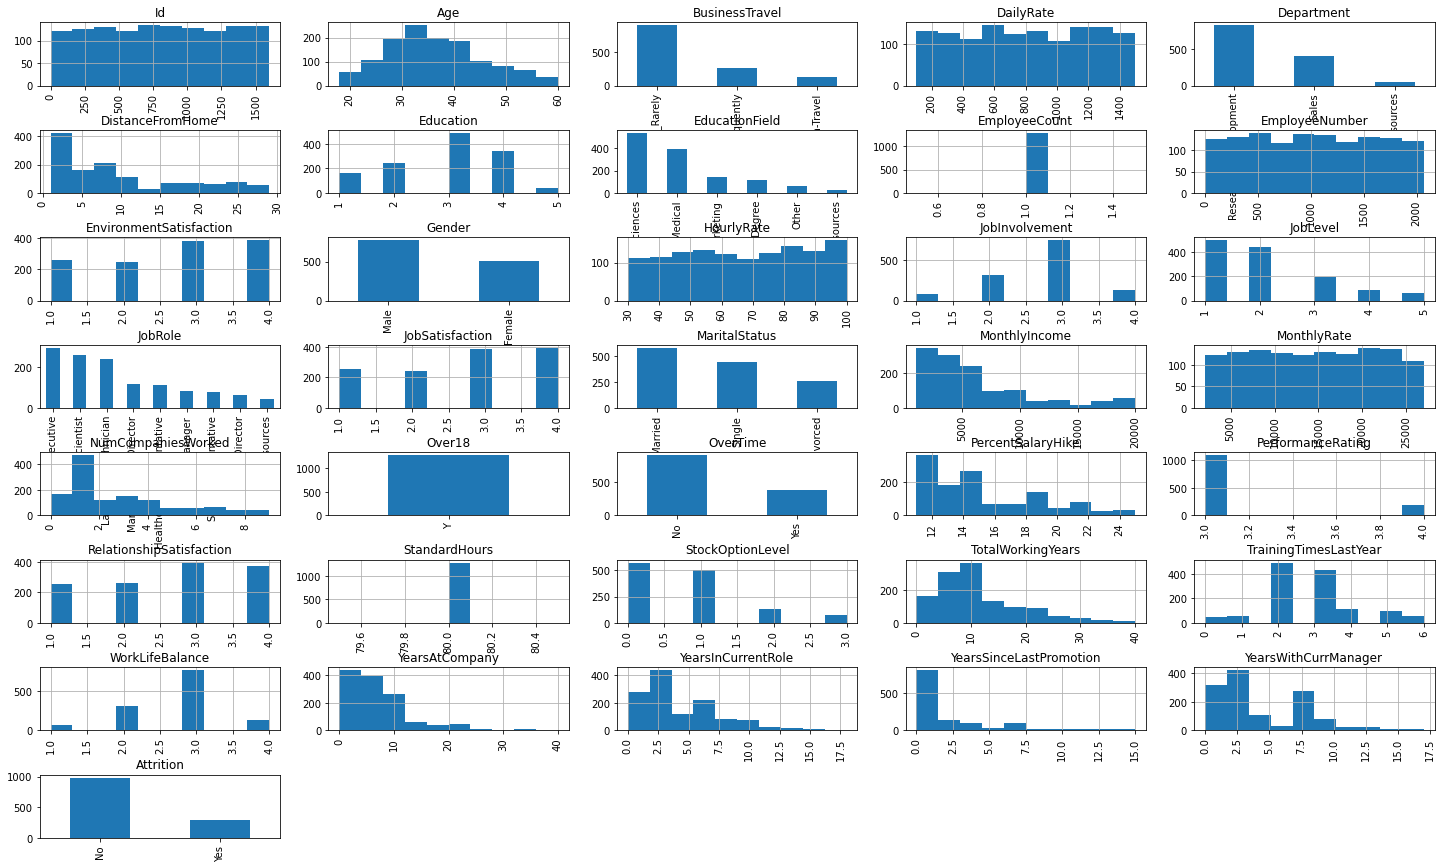

In [6]:
# Code starts here
categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
numerical_columns = [c for c in train.columns 
                     if train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)


fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(train.shape[1]) / cols)
for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# encode target variable as integer
train.loc[train['Attrition']=='Yes', 'Attrition'] = 1
train.loc[train['Attrition']=='No', 'Attrition'] = 0
train['Attrition'].astype(bool)
# Code ends here

In [7]:
train.drop(['EmployeeCount','Over18','StandardHours'],1,inplace=True)
# Dropping the same columns from the test data
test.drop(['EmployeeCount','Over18','StandardHours'],1,inplace=True)

categorical_columns = [c for c in train.columns 
                       if train[c].dtype.name == 'object']
le = LabelEncoder()

for x in categorical_columns:
    train[x] = le.fit_transform(train[x])
    if x in [c for c in test.columns 
                       if test[c].dtype.name == 'object']:
        test[x] = le.transform(test[x])
    


In [8]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

### Model building

- Now let's come to the actual task, using Decision Tree/Ensemble Technique, predict the `Attrition`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the [ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [9]:
# Code Starts here
tree = DecisionTreeClassifier(max_depth=9, random_state=18)
tree.fit(X_train, y_train)

tree_predictions = tree.predict(X_val) 
print("Decision tree accuracy: ",accuracy_score(y_val,tree_predictions))
print('The AUC_ROC_score is :' ,roc_auc_score(y_val,tree_predictions))


# Code ends here

Decision tree accuracy:  0.8077922077922078
The AUC_ROC_score is : 0.6940188224313604


In [10]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  


# Your code here

locally_best_tree.fit(X_train, y_train)

print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 3}
Best cross validaton score 0.8672004965859715


In [11]:
tuned_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_val)
print("Decision tree Accuracy after tuning: ",accuracy_score(y_val, tuned_tree_predictions))
print('The AUC_ROC_score is :' ,roc_auc_score(y_val,tuned_tree_predictions))

Decision tree Accuracy after tuning:  0.8519480519480519
The AUC_ROC_score is : 0.6893132145912733


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [12]:
# Code Starts here
# Storing the id from the test file
id_ = test['Id']

# Predict on the test data
y_pred_test = tuned_tree.predict(test)

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'Attrition':y_pred_test})

final_submission.loc[final_submission['Attrition']==1, 'Attrition'] = 'Yes'
final_submission.loc[final_submission['Attrition']==0, 'Attrition'] = 'No'

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here